In [7]:
import pandas as pd
import numpy as np
from pytrends.request import TrendReq

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Bitcoin

In [23]:
data = pd.read_csv('../../data/processed/SOL-USD_raw.csv', index_col='Date', parse_dates=True)

In [24]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Close,2026.0,8.442304e+01,7.463384e+01,0.515273,2.034899e+01,4.512917e+01,1.487481e+02,2.618698e+02
High,2026.0,8.753539e+01,7.713699e+01,0.559759,2.092448e+01,4.837252e+01,1.538436e+02,2.943350e+02
Low,2026.0,8.118624e+01,7.202592e+01,0.505194,1.979724e+01,4.274958e+01,1.447272e+02,2.531874e+02
Open,2026.0,8.434070e+01,7.463489e+01,0.513391,2.032012e+01,4.494825e+01,1.487131e+02,2.618724e+02
Volume,2026.0,2.182471e+09,2.677272e+09,652020.000000,3.238079e+08,1.367602e+09,3.022110e+09,3.317296e+10


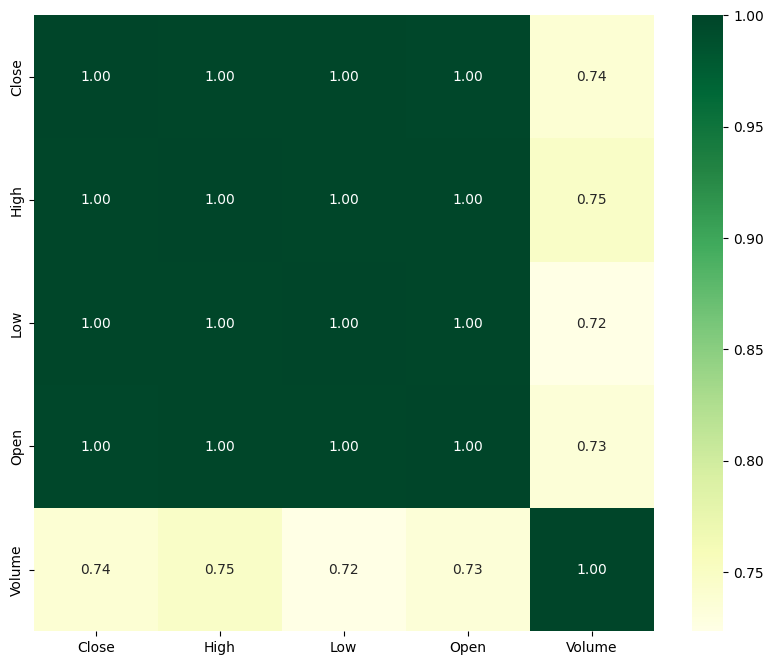

In [25]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(data.corr(), annot=True, cmap="YlGn", fmt=".2f")
plt.show()

In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
data_scaled = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

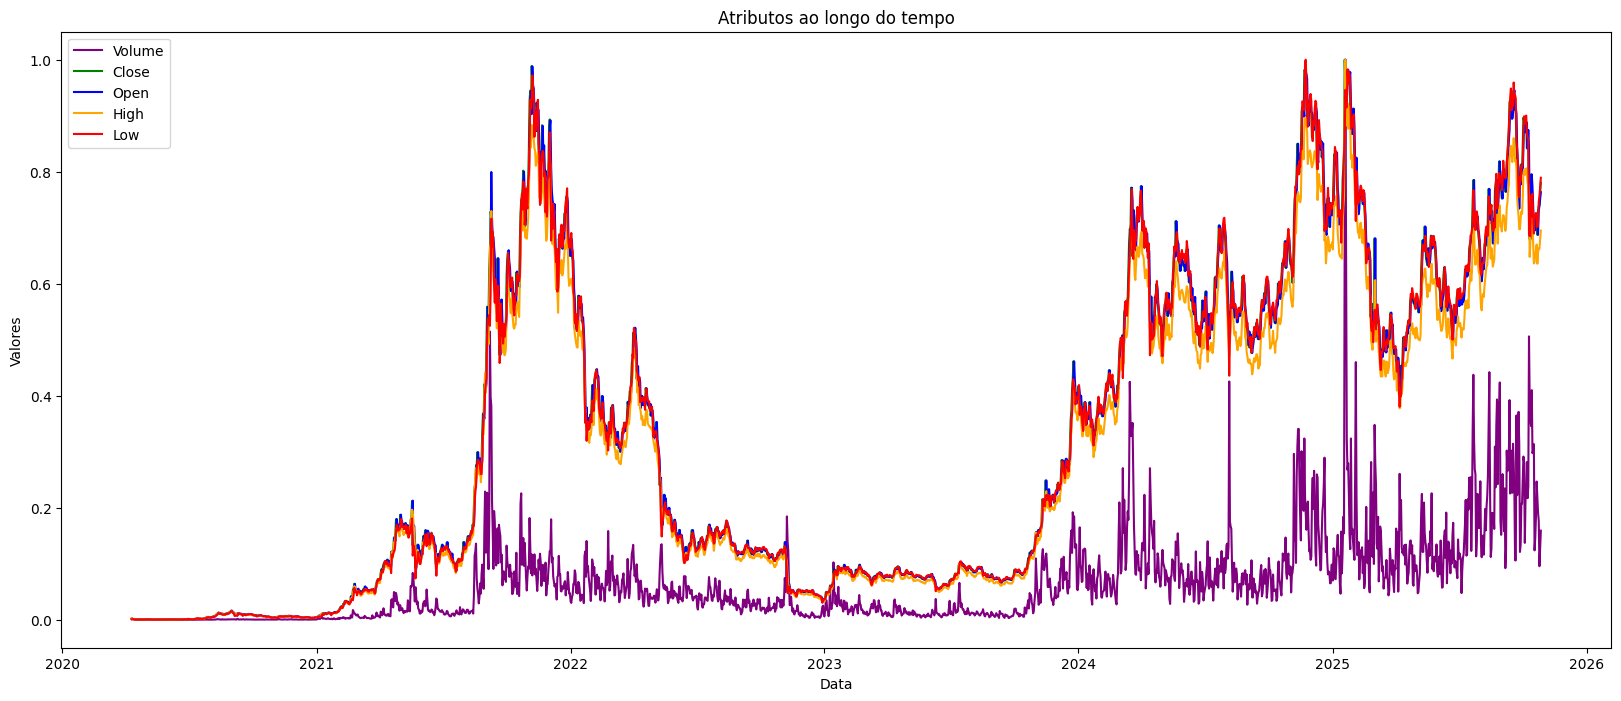

In [27]:
plt.figure(figsize=(20,8))

plt.plot(data_scaled.index, data_scaled['Volume'], label='Volume', color='purple')
plt.plot(data_scaled.index, data_scaled['Close'], label='Close', color='green')
plt.plot(data_scaled.index, data_scaled['Open'], label='Open', color='blue')
plt.plot(data_scaled.index, data_scaled['High'], label='High', color='orange')
plt.plot(data_scaled.index, data_scaled['Low'], label='Low', color='red')

plt.title('Atributos ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.show()

#### Adicionando Google Trends

In [ ]:
from pytrends.request import TrendReq
import pandas as pd
import time

# Configuração PyTrends
pytrends = TrendReq(hl='en-US', tz=360)

# Termos que você quer pesquisar
kw_list = ["crypto", "solana"]

# Função para gerar intervalos anuais entre datas inicial e final
def generate_halfyear_intervals(start_year, start_month, start_day, end_year, end_month, end_day):
    intervals = []
    current_start = pd.Timestamp(year=start_year, month=start_month, day=start_day)
    final_end = pd.Timestamp(year=end_year, month=end_month, day=end_day)

    while current_start < final_end:
        current_end = current_start + pd.DateOffset(months=6) - pd.DateOffset(days=1)
        if current_end > final_end:
            current_end = final_end
        intervals.append((current_start.strftime('%Y-%m-%d'), current_end.strftime('%Y-%m-%d')))
        current_start = current_end + pd.DateOffset(days=1)
    return intervals

intervals = generate_halfyear_intervals(2014, 9, 17, 2025, 10, 27)

dfs = []

# Loop para buscar os dados de cada intervalo
for start, end in intervals:
    print(f"Buscando dados de {start} até {end}...")
    pytrends.build_payload(kw_list, cat=0, timeframe=f'{start} {end}', geo='')
    
    # Tentar pegar os dados e lidar com possíveis falhas
    try:
        df = pytrends.interest_over_time()
        if not df.empty:
            dfs.append(df)
    except Exception as e:
        print(f"Erro ao buscar dados: {e}")
    
    # Espera para não ser bloqueado
    time.sleep(60)  

# Concatenar todos os intervalos em um único DataFrame
interest_over_time_df = pd.concat(dfs)
interest_over_time_df = interest_over_time_df[~interest_over_time_df.index.duplicated(keep='first')]


Buscando dados de 2014-09-17 até 2015-03-16...
Buscando dados de 2015-03-17 até 2015-09-16...
Buscando dados de 2015-09-17 até 2016-03-16...
Buscando dados de 2016-03-17 até 2016-09-16...
Buscando dados de 2016-09-17 até 2017-03-16...
Buscando dados de 2017-03-17 até 2017-09-16...
Buscando dados de 2017-09-17 até 2018-03-16...
Buscando dados de 2018-03-17 até 2018-09-16...
Buscando dados de 2018-09-17 até 2019-03-16...
Buscando dados de 2019-03-17 até 2019-09-16...
Buscando dados de 2019-09-17 até 2020-03-16...
Buscando dados de 2020-03-17 até 2020-09-16...
Buscando dados de 2020-09-17 até 2021-03-16...
Buscando dados de 2021-03-17 até 2021-09-16...
Buscando dados de 2021-09-17 até 2022-03-16...
Buscando dados de 2022-03-17 até 2022-09-16...
Buscando dados de 2022-09-17 até 2023-03-16...
Buscando dados de 2023-03-17 até 2023-09-16...
Buscando dados de 2023-09-17 até 2024-03-16...
Buscando dados de 2024-03-17 até 2024-09-16...
Buscando dados de 2024-09-17 até 2025-03-16...
Buscando dado

In [22]:
# Mostrar os primeiros dados
interest_over_time_df.head(10)

,crypto,bitcoin,isPartial
date,,,
2014-09-17,6,48,False
2014-09-18,7,51,False
2014-09-19,5,56,False
2014-09-20,4,49,False
2014-09-21,4,50,False
2014-09-22,6,52,False
2014-09-23,6,58,False
2014-09-24,7,59,False
2014-09-25,6,52,False


In [29]:
# Seleciona apenas as colunas de interesse do Google Trends
trends_cols = interest_over_time_df[["crypto", "bitcoin"]]

# Faz o merge pelo índice de datas
data_merged = data.merge(trends_cols, left_index=True, right_index=True, how='left')


In [30]:
data_merged.head(10)

,Close,High,Low,Open,Volume,crypto,bitcoin
Date,,,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800,6,48
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200,7,51
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700,5,56
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600,4,49
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100,4,50
2014-09-22,402.152008,406.915985,397.130005,399.100006,24127600,6,52
2014-09-23,435.790985,441.557007,396.196991,402.092010,45099500,6,58
2014-09-24,423.204987,436.112000,421.131989,435.751007,30627700,7,59
2014-09-25,411.574005,423.519989,409.467987,423.156006,26814400,6,52


In [25]:
data_merged.isna().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
crypto    0
dtype: int64

In [38]:
data_merged.drop(columns="bitcoin")

,Close,High,Low,Open,Volume,crypto
Date,,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800,6
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200,7
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700,5
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600,4
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100,4
...,...,...,...,...,...,...
2025-10-22,107688.585938,109115.132812,106778.000000,108491.531250,80807013218,15
2025-10-23,110069.726562,111288.593750,107548.429688,107679.437500,54944076060,15
2025-10-24,111033.921875,111842.531250,109770.148438,110069.351562,48160816980,15


In [ ]:
# data_merged.to_csv('../data/processed/BTC-USD_crypto_all.csv', index=True)

In [32]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_merged)
data_scaled = pd.DataFrame(scaled_data, columns=data_merged.columns, index=data_merged.index)

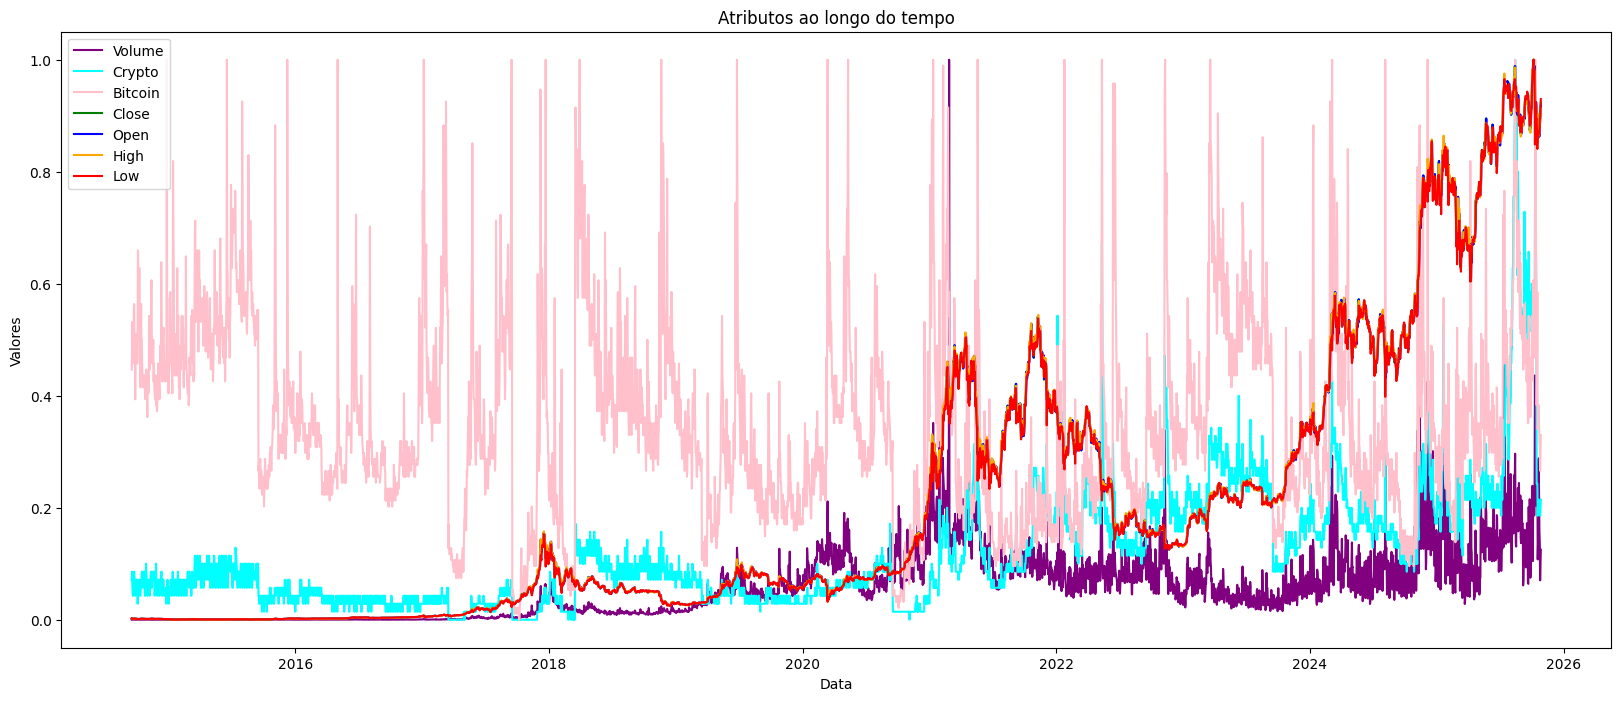

In [40]:
plt.figure(figsize=(20,8))

plt.plot(data_scaled.index, data_scaled['Volume'], label='Volume', color='purple')
plt.plot(data_scaled.index, data_scaled['crypto'], label='Crypto', color='cyan')
plt.plot(data_scaled.index, data_scaled['bitcoin'], label='Bitcoin', color='pink')
plt.plot(data_scaled.index, data_scaled['Close'], label='Close', color='green')
plt.plot(data_scaled.index, data_scaled['Open'], label='Open', color='blue')
plt.plot(data_scaled.index, data_scaled['High'], label='High', color='orange')
plt.plot(data_scaled.index, data_scaled['Low'], label='Low', color='red')


plt.title('Atributos ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.show()

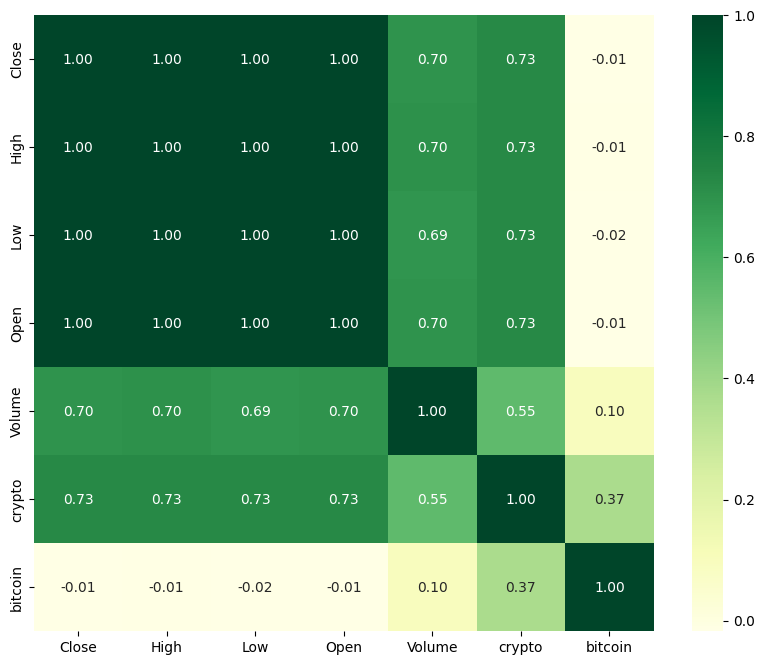

In [37]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(data_merged.corr(), annot=True, cmap="YlGn", fmt=".2f")
plt.show()